<a href="https://colab.research.google.com/github/johanjun/dacon_molit/blob/main/%EB%B0%B0%EB%8B%AC%2C%EC%9D%B4%EB%A5%9C_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#한글폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
#라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import numpy as np
import seaborn as sns
import re
import shutil
import random
import missingno as msno
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import warnings
warnings.filterwarnings(action='ignore')

pd.set_option("max_rows", 1000)
pd.set_option("max_columns", 1000)
import folium
import json

In [2]:
data_dir = '/content/drive/MyDrive/dacon_molit/data/'

# 이륜차 신고 현황

In [262]:
df_2wheel = pd.read_csv(data_dir+'이륜차신고현황_연도별_20210822144233.csv', encoding='euc-kr')

In [263]:
df_2wheel.head()

,구분(1),레벨01(1),2018,2018.1,2018.2,2018.3,2018.4,2019,2019.1,2019.2,2019.3,2019.4,2020,2020.1,2020.2,2020.3,2020.4
0,구분(1),레벨01(1),소계,50cc미만,50cc이상,100cc초과,260cc초과,소계,50cc미만,50cc이상,100cc초과,260cc초과,소계,50cc미만,50cc이상,100cc초과,260cc초과
1,총합계,계,2208424,145872,866702,1097381,98469,2236895,142993,862922,1117862,113118,2289009,140280,862641,1153804,132284
2,총합계,관용,26914,1596,5349,19322,647,27083,1813,5309,19263,698,26810,1941,5342,18799,728
3,총합계,자가용,2181510,144276,861353,1078059,97822,2209812,141180,857613,1098599,112420,2262199,138339,857299,1135005,131556


In [264]:
df_2wheel = df_2wheel.T

In [265]:
df_2wheel.iloc[1, :]

0    레벨01(1)
1          계
2         관용
3        자가용
Name: 레벨01(1), dtype: object

In [266]:
df_2wheel.rename(columns=df_2wheel.iloc[1], inplace=True)

In [267]:
df_2wheel.drop(index='구분(1)', inplace=True)
df_2wheel.drop(index='레벨01(1)', inplace=True)
df_2wheel.head()

,레벨01(1),계,관용,자가용
2018,소계,2208424,26914,2181510
2018.1,50cc미만,145872,1596,144276
2018.2,50cc이상,866702,5349,861353
2018.3,100cc초과,1097381,19322,1078059
2018.4,260cc초과,98469,647,97822


In [268]:
for i in df_2wheel.columns[1:]:
  print(i)
  df_2wheel[i] = df_2wheel[i].apply(lambda x : int(x))
df_2wheel.info()

계
관용
자가용
<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2018 to 2020.4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   레벨01(1)  15 non-null     object
 1   계        15 non-null     int64 
 2   관용       15 non-null     int64 
 3   자가용      15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 600.0+ bytes


In [269]:
df_2wheel['time'] = df_2wheel.index
df_2wheel.reset_index(drop=True, inplace=True)

In [270]:
df_2wheel

,레벨01(1),계,관용,자가용,time
0,소계,2208424,26914,2181510,2018
1,50cc미만,145872,1596,144276,2018.1
2,50cc이상,866702,5349,861353,2018.2
3,100cc초과,1097381,19322,1078059,2018.3
4,260cc초과,98469,647,97822,2018.4
5,소계,2236895,27083,2209812,2019
6,50cc미만,142993,1813,141180,2019.1
7,50cc이상,862922,5309,857613,2019.2
8,100cc초과,1117862,19263,1098599,2019.3
9,260cc초과,113118,698,112420,2019.4


In [271]:
for i, x in enumerate(df_2wheel['time']):
  if '.' in x:
    df_2wheel['time'][i] = x.split('.')[0]

In [272]:
df_2wheel

,레벨01(1),계,관용,자가용,time
0,소계,2208424,26914,2181510,2018
1,50cc미만,145872,1596,144276,2018
2,50cc이상,866702,5349,861353,2018
3,100cc초과,1097381,19322,1078059,2018
4,260cc초과,98469,647,97822,2018
5,소계,2236895,27083,2209812,2019
6,50cc미만,142993,1813,141180,2019
7,50cc이상,862922,5309,857613,2019
8,100cc초과,1117862,19263,1098599,2019
9,260cc초과,113118,698,112420,2019


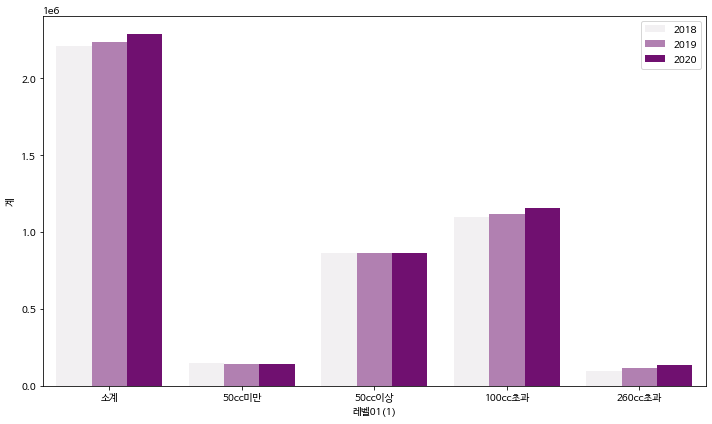

In [117]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_2wheel, 
            x='레벨01(1)', y='계', 
            hue='time', color='purple')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 배달앱 사용 현황

In [3]:
df_delivery = pd.read_csv(data_dir+'배달앱_및_배달대행_이용현황_20210822144217.csv', encoding='euc-kr')

In [4]:
# df_delivery.rename(columns=df_delivery.iloc[0]+'-'+df_delivery.iloc[1]+'-'+df_delivery.iloc[2], inplace=True)

In [5]:
for i in df_delivery:
  if df_delivery[i][0] == '배달대행':
    df_delivery.drop(columns=i, inplace=True)

In [6]:
df_delivery.drop(index=0, inplace=True)

In [7]:
df_delivery.head(10)

,특성별(1),특성별(2),특성별(3),특성별(4),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7
1,특성별(1),특성별(2),특성별(3),특성별(4),이용여부 (%),이용여부 (%),월평균 비용,월평균 비용,월평균 비용,월평균 비용,월평균 비용,월평균 비용,이용여부 (%),이용여부 (%),월평균 비용,월평균 비용,월평균 비용,월평균 비용,월평균 비용,이용여부 (%),이용여부 (%),월평균 비용,월평균 비용,월평균 비용,월평균 비용,월평균 비용,월평균 비용
2,특성별(1),특성별(2),특성별(3),특성별(4),예,아니오,5만원 미만 (%),5만원~15만원 미만 (%),15만원~50만원 미만 (%),50만원 이상 (%),무응답 (%),평균 (원),예,아니오,5만원 미만 (%),5만원~15만원 미만 (%),15만원~50만원 미만 (%),50만원 이상 (%),평균 (원),예,아니오,5만원 미만 (%),5만원~15만원 미만 (%),15만원~50만원 미만 (%),50만원 이상 (%),모름 (%),평균 (원)
3,전체,소계,소계,소계,7.6,92.4,6.9,33.8,48.3,10.7,0.3,246909.9,11.2,88.8,4.7,23.0,55.6,16.8,318230.4,19.9,80.1,5.6,24.9,47.1,18.3,4.2,360436.1
4,업종별,일반음식점,소계,소계,6.2,93.8,5.2,36.8,44.3,13.7,0.0,235386.0,9.4,90.6,4.1,27.1,48.1,20.7,338719.6,17.0,83.0,5.9,22.4,51.2,16.4,4.1,353124.7
5,업종별,일반음식점,한식,소계,5.3,94.7,4.5,32.1,46.6,16.7,0.0,245033.5,6.9,93.1,2.9,17.6,52.3,27.3,392673.1,13.7,86.3,4.3,21.6,54.4,16.2,3.5,356608.9
6,업종별,일반음식점,중식,소계,18.7,81.3,8.0,49.6,40.5,1.9,0.0,168968.7,37.2,62.8,6.8,42.3,44.1,6.8,235943.5,36.0,64.0,12.6,11.7,49.6,18.9,7.2,373188.9
7,업종별,일반음식점,일식,소계,3.1,96.9,16.3,29.1,30.1,24.5,0.0,256042.3,15.7,84.3,8.4,37.0,25.1,29.5,382619.0,43.0,57.0,6.9,37.3,36.4,16.3,3.0,328540.0
8,업종별,일반음식점,서양식,소계,6.7,93.3,0.0,67.6,24.0,8.4,0.0,397296.3,12.2,87.8,0.0,63.2,36.2,0.6,150165.0,34.5,65.5,3.2,30.2,48.9,13.9,3.8,347108.4
9,업종별,일반음식점,기타 외국식,소계,4.3,95.7,0.0,25.9,35.1,39.0,0.0,279009.2,8.0,92.0,0.0,5.2,66.5,28.3,312090.6,19.9,80.1,23.9,34.1,17.6,12.2,12.2,167259.6
10,업종별,일반음식점 외,소계,소계,9.3,90.7,8.1,31.6,51.3,8.5,0.5,255400.9,13.1,86.9,5.2,19.7,61.5,13.6,301942.9,23.0,77.0,5.3,26.8,43.8,19.8,4.3,366326.2


In [8]:
for i, x in df_delivery.iterrows():
  if x['특성별(3)'] == '기타 음식점업':
    x['특성별(3)'] = x['특성별(4)']

In [9]:
df_delivery.drop(columns=['특성별(4)'], inplace=True)

In [10]:
for i, x in df_delivery.iterrows():
  if x['특성별(3)'] == '소계':
    x['특성별(3)'] = x['특성별(1)'] + '-' + x['특성별(2)']

In [11]:
df_delivery.drop(columns=['특성별(1)'], inplace=True)
df_delivery.drop(columns=['특성별(2)'], inplace=True)

In [12]:
df_delivery.head()

,특성별(3),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7
1,특성별(3),이용여부 (%),이용여부 (%),월평균 비용,월평균 비용,월평균 비용,월평균 비용,월평균 비용,월평균 비용,이용여부 (%),이용여부 (%),월평균 비용,월평균 비용,월평균 비용,월평균 비용,월평균 비용,이용여부 (%),이용여부 (%),월평균 비용,월평균 비용,월평균 비용,월평균 비용,월평균 비용,월평균 비용
2,특성별(3),예,아니오,5만원 미만 (%),5만원~15만원 미만 (%),15만원~50만원 미만 (%),50만원 이상 (%),무응답 (%),평균 (원),예,아니오,5만원 미만 (%),5만원~15만원 미만 (%),15만원~50만원 미만 (%),50만원 이상 (%),평균 (원),예,아니오,5만원 미만 (%),5만원~15만원 미만 (%),15만원~50만원 미만 (%),50만원 이상 (%),모름 (%),평균 (원)
3,전체-소계,7.6,92.4,6.9,33.8,48.3,10.7,0.3,246909.9,11.2,88.8,4.7,23.0,55.6,16.8,318230.4,19.9,80.1,5.6,24.9,47.1,18.3,4.2,360436.1
4,업종별-일반음식점,6.2,93.8,5.2,36.8,44.3,13.7,0.0,235386.0,9.4,90.6,4.1,27.1,48.1,20.7,338719.6,17.0,83.0,5.9,22.4,51.2,16.4,4.1,353124.7
5,한식,5.3,94.7,4.5,32.1,46.6,16.7,0.0,245033.5,6.9,93.1,2.9,17.6,52.3,27.3,392673.1,13.7,86.3,4.3,21.6,54.4,16.2,3.5,356608.9


In [13]:
df_delivery_T = df_delivery.T

In [14]:
df_delivery_T.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
특성별(3),특성별(3),특성별(3),전체-소계,업종별-일반음식점,한식,중식,일식,서양식,기타 외국식,업종별-일반음식점 외,기관 구내식당업,출장·이동음식점업,제과점,피자·햄버거·샌드위치 및 유사 음식점업,치킨전문점,김밥 및 기타 간이 음식점업,간이 음식 포장 판매 전문점,주점업,비알콜 음료점업,운영형태별-프랜차이즈,운영형태별-비프랜차이즈,지역별-서울권,지역별-수도권,지역별-충청권,지역별-호남권,지역별-경남권,지역별-경북권,매출액규모별-5천만원 미만,매출액규모별-5천만원~1억원 미만,매출액규모별-1억원~5억원 미만,매출액규모별-5억원 이상
2018,이용여부 (%),예,7.6,6.2,5.3,18.7,3.1,6.7,4.3,9.3,0.0,0.0,1.5,43.1,45.5,6.4,1.7,2.2,2.5,24.5,4.6,5.6,8.8,6.6,4.3,8.7,10.3,2.2,5.3,9.7,9.8
2018.1,이용여부 (%),아니오,92.4,93.8,94.7,81.3,96.9,93.3,95.7,90.7,100.0,100.0,98.5,56.9,54.5,93.6,98.3,97.8,97.5,75.5,95.4,94.4,91.2,93.4,95.7,91.3,89.7,97.8,94.7,90.3,90.2
2018.2,월평균 비용,5만원 미만 (%),6.9,5.2,4.5,8.0,16.3,0.0,0.0,8.1,0.0,0.0,0.0,9.8,9.3,9.1,0.0,2.4,0.0,4.8,9.0,7.7,9.4,0.0,13.2,7.1,4.0,0.0,7.5,7.5,0.0
2018.3,월평균 비용,5만원~15만원 미만 (%),33.8,36.8,32.1,49.6,29.1,67.6,25.9,31.6,0.0,0.0,67.0,23.7,27.4,66.4,58.5,28.1,41.5,35.8,31.9,36.7,19.4,30.2,39.3,70.3,17.1,31.2,48.0,31.6,15.1


In [15]:
df_delivery_T.rename(columns=df_delivery_T.iloc[0], inplace=True)

In [16]:
df_delivery_T.drop(index='특성별(3)', inplace=True)

In [17]:
df_delivery_T['time'] = df_delivery_T.index
df_delivery_T.reset_index(drop=True, inplace=True)

In [18]:
# for i, x in enumerate(df_delivery_T['time']):
#   if '.' in x:
#     df_delivery_T['time'][i] = x.split('.')[0]

In [19]:
df_delivery_T['time'] = df_delivery_T['time'].apply(lambda x : x.split('.')[0])

In [20]:
df_delivery_T.columns = ['특성별1', '특성별2', '전체-소계', '업종별-일반음식점', '한식', '중식', '일식', '서양식',
       '기타 외국식', '업종별-일반음식점 외', '기관 구내식당업', '출장·이동음식점업', '제과점',
       '피자·햄버거·샌드위치 및 유사 음식점업', '치킨전문점', '김밥 및 기타 간이 음식점업', '간이 음식 포장 판매 전문점',
       '주점업', '비알콜 음료점업', '운영형태별-프랜차이즈', '운영형태별-비프랜차이즈', '지역별-서울권', '지역별-수도권',
       '지역별-충청권', '지역별-호남권', '지역별-경남권', '지역별-경북권', '매출액규모별-5천만원 미만',
       '매출액규모별-5천만원~1억원 미만', '매출액규모별-1억원~5억원 미만', '매출액규모별-5억원 이상', 'time']

In [21]:
df_delivery_T['기관 구내식당업'] = df_delivery_T['기관 구내식당업'].replace('-', np.nan)
df_delivery_T['출장·이동음식점업'] = df_delivery_T['출장·이동음식점업'].replace('-', np.nan)

In [22]:
df_delivery_T

,특성별1,특성별2,전체-소계,업종별-일반음식점,한식,중식,일식,서양식,기타 외국식,업종별-일반음식점 외,기관 구내식당업,출장·이동음식점업,제과점,피자·햄버거·샌드위치 및 유사 음식점업,치킨전문점,김밥 및 기타 간이 음식점업,간이 음식 포장 판매 전문점,주점업,비알콜 음료점업,운영형태별-프랜차이즈,운영형태별-비프랜차이즈,지역별-서울권,지역별-수도권,지역별-충청권,지역별-호남권,지역별-경남권,지역별-경북권,매출액규모별-5천만원 미만,매출액규모별-5천만원~1억원 미만,매출액규모별-1억원~5억원 미만,매출액규모별-5억원 이상,time
0,이용여부 (%),예,7.6,6.2,5.3,18.7,3.1,6.7,4.3,9.3,0.0,0.0,1.5,43.1,45.5,6.4,1.7,2.2,2.5,24.5,4.6,5.6,8.8,6.6,4.3,8.7,10.3,2.2,5.3,9.7,9.8,2018
1,이용여부 (%),아니오,92.4,93.8,94.7,81.3,96.9,93.3,95.7,90.7,100.0,100.0,98.5,56.9,54.5,93.6,98.3,97.8,97.5,75.5,95.4,94.4,91.2,93.4,95.7,91.3,89.7,97.8,94.7,90.3,90.2,2018
2,월평균 비용,5만원 미만 (%),6.9,5.2,4.5,8.0,16.3,0.0,0.0,8.1,0.0,0.0,0.0,9.8,9.3,9.1,0.0,2.4,0.0,4.8,9.0,7.7,9.4,0.0,13.2,7.1,4.0,0.0,7.5,7.5,0.0,2018
3,월평균 비용,5만원~15만원 미만 (%),33.8,36.8,32.1,49.6,29.1,67.6,25.9,31.6,0.0,0.0,67.0,23.7,27.4,66.4,58.5,28.1,41.5,35.8,31.9,36.7,19.4,30.2,39.3,70.3,17.1,31.2,48.0,31.6,15.1,2018
4,월평균 비용,15만원~50만원 미만 (%),48.3,44.3,46.6,40.5,30.1,24.0,35.1,51.3,0.0,0.0,33.0,47.9,54.2,24.5,41.5,69.5,58.5,47.5,49.1,44.6,64.3,50.5,34.2,20.2,58.8,21.6,44.5,50.3,52.5,2018
5,월평균 비용,50만원 이상 (%),10.7,13.7,16.7,1.9,24.5,8.4,39.0,8.5,0.0,0.0,0.0,16.6,9.0,0.0,0.0,0.0,0.0,11.4,10.0,10.9,5.9,19.4,13.3,2.4,20.2,47.2,0.0,10.6,26.9,2018
6,월평균 비용,무응답 (%),0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,2018
7,월평균 비용,평균 (원),246909.9,235386.0,245033.5,168968.7,256042.3,397296.3,279009.2,255400.9,0.0,0.0,162679.1,321533.1,272610.0,117212.6,176210.2,201031.1,172608.3,272511.0,222154.1,256369.6,229720.4,232761.5,384615.8,118682.6,350267.4,309275.8,165670.9,249840.8,472087.7,2018
8,이용여부 (%),예,11.2,9.4,6.9,37.2,15.7,12.2,8.0,13.1,0.0,0.0,1.6,55.2,57.4,7.3,10.0,2.0,6.6,28.9,6.7,9.7,10.9,10.2,10.1,16.1,8.0,2.0,5.9,13.8,19.1,2019
9,이용여부 (%),아니오,88.8,90.6,93.1,62.8,84.3,87.8,92.0,86.9,100.0,100.0,98.4,44.8,42.6,92.7,90.0,98.0,93.4,71.1,93.3,90.3,89.1,89.8,89.9,83.9,92.0,98.0,94.1,86.2,80.9,2019


In [23]:
for i in df_delivery_T.columns[2:-1]:
  df_delivery_T[i] = df_delivery_T[i].astype('float64')

In [26]:
df_delivery_T['특성별1'].unique()

array(['이용여부 (%)', '월평균 비용'], dtype=object)

In [45]:
df_delivery_T.columns

Index(['특성별1', '특성별2', '전체-소계', '업종별-일반음식점', '한식', '중식', '일식', '서양식', '기타 외국식',
       '업종별-일반음식점 외', '기관 구내식당업', '출장·이동음식점업', '제과점', '피자·햄버거·샌드위치 및 유사 음식점업',
       '치킨전문점', '김밥 및 기타 간이 음식점업', '간이 음식 포장 판매 전문점', '주점업', '비알콜 음료점업',
       '운영형태별-프랜차이즈', '운영형태별-비프랜차이즈', '지역별-서울권', '지역별-수도권', '지역별-충청권',
       '지역별-호남권', '지역별-경남권', '지역별-경북권', '매출액규모별-5천만원 미만', '매출액규모별-5천만원~1억원 미만',
       '매출액규모별-1억원~5억원 미만', '매출액규모별-5억원 이상', 'time'],
      dtype='object')

In [54]:
fig.add_subplot?

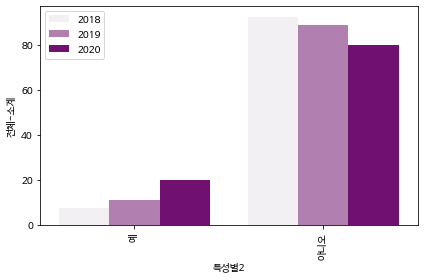

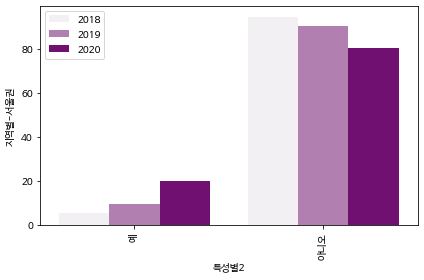

In [55]:
df_col = df_delivery_T.loc[:, ['전체-소계', '지역별-서울권']]
for i, x in enumerate(df_col):
  ax = fig.add_subplot(len(df_col), 1, i+1)
  sns.barplot(data=df_delivery_T[df_delivery_T['특성별1']=='이용여부 (%)'], 
            x='특성별2', y=x, 
            hue='time',
            color='purple')
  plt.legend(loc='best')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

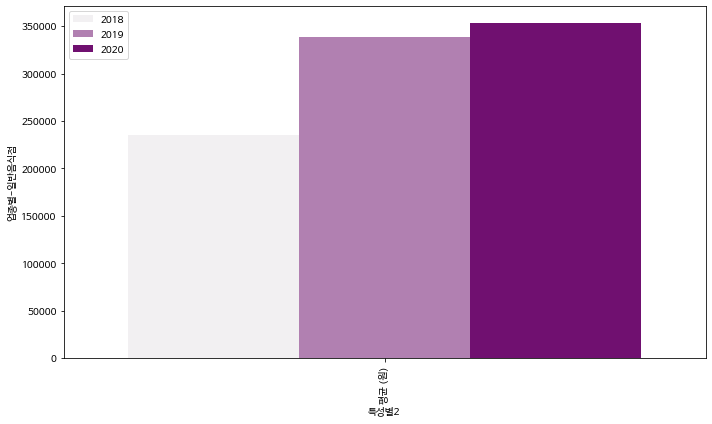

In [70]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_delivery_T[df_delivery_T['특성별2']=='평균 (원)'], 
            x='특성별2', y='업종별-일반음식점', 
            hue='time', color='purple')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

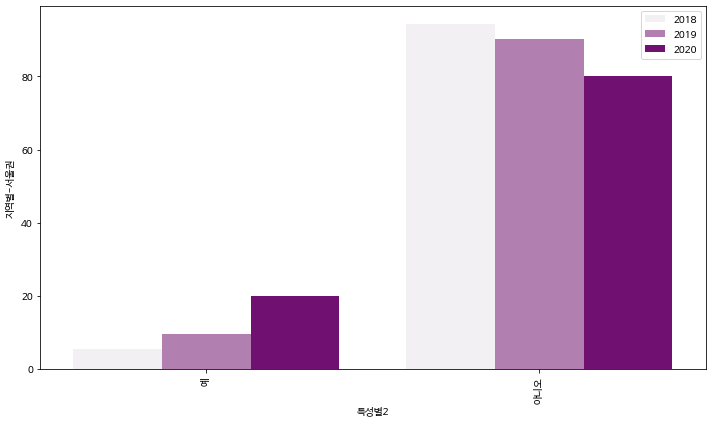

In [65]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_delivery_T[df_delivery_T['특성별1']=='이용여부 (%)'], 
            x='특성별2', y='지역별-서울권', 
            hue='time', color='purple')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [59]:
df_delivery_T[df_delivery_T['특성별2']=='평균 (원)']

,특성별1,특성별2,전체-소계,업종별-일반음식점,한식,중식,일식,서양식,기타 외국식,업종별-일반음식점 외,기관 구내식당업,출장·이동음식점업,제과점,피자·햄버거·샌드위치 및 유사 음식점업,치킨전문점,김밥 및 기타 간이 음식점업,간이 음식 포장 판매 전문점,주점업,비알콜 음료점업,운영형태별-프랜차이즈,운영형태별-비프랜차이즈,지역별-서울권,지역별-수도권,지역별-충청권,지역별-호남권,지역별-경남권,지역별-경북권,매출액규모별-5천만원 미만,매출액규모별-5천만원~1억원 미만,매출액규모별-1억원~5억원 미만,매출액규모별-5억원 이상,time
7,월평균 비용,평균 (원),246909.9,235386.0,245033.5,168968.7,256042.3,397296.3,279009.2,255400.9,0.0,0.0,162679.1,321533.1,272610.0,117212.6,176210.2,201031.1,172608.3,272511.0,222154.1,256369.6,229720.4,232761.5,384615.8,118682.6,350267.4,309275.8,165670.9,249840.8,472087.7,2018
14,월평균 비용,평균 (원),318230.4,338719.6,392673.1,235943.5,382619.0,150165.0,312090.6,301942.9,NaN,NaN,587611.8,306955.0,324037.5,181861.4,565763.9,243016.9,240676.0,345949.5,287838.1,338523.9,366492.6,280249.8,278019.6,283893.1,353602.0,178260.9,266616.3,313140.8,559147.5,2019
22,월평균 비용,평균 (원),360436.1,353124.7,356608.9,373188.9,328540.0,347108.4,167259.6,366326.2,NaN,700000.0,170315.3,585980.0,364211.2,364499.5,319231.8,387605.1,205828.8,382144.4,328638.7,370048.4,397012.7,460393.4,233607.4,311115.8,263120.7,187796.2,233843.1,382625.9,492248.7,2020


In [ ]:
df_delivery_T.iloc[:, 2:-1]

In [64]:
df_delivery_T.head()

,특성별1,특성별2,전체-소계,업종별-일반음식점,한식,중식,일식,서양식,기타 외국식,업종별-일반음식점 외,기관 구내식당업,출장·이동음식점업,제과점,피자·햄버거·샌드위치 및 유사 음식점업,치킨전문점,김밥 및 기타 간이 음식점업,간이 음식 포장 판매 전문점,주점업,비알콜 음료점업,운영형태별-프랜차이즈,운영형태별-비프랜차이즈,지역별-서울권,지역별-수도권,지역별-충청권,지역별-호남권,지역별-경남권,지역별-경북권,매출액규모별-5천만원 미만,매출액규모별-5천만원~1억원 미만,매출액규모별-1억원~5억원 미만,매출액규모별-5억원 이상,time
0,이용여부 (%),예,7.6,6.2,5.3,18.7,3.1,6.7,4.3,9.3,0.0,0.0,1.5,43.1,45.5,6.4,1.7,2.2,2.5,24.5,4.6,5.6,8.8,6.6,4.3,8.7,10.3,2.2,5.3,9.7,9.8,2018
1,이용여부 (%),아니오,92.4,93.8,94.7,81.3,96.9,93.3,95.7,90.7,100.0,100.0,98.5,56.9,54.5,93.6,98.3,97.8,97.5,75.5,95.4,94.4,91.2,93.4,95.7,91.3,89.7,97.8,94.7,90.3,90.2,2018
2,월평균 비용,5만원 미만 (%),6.9,5.2,4.5,8.0,16.3,0.0,0.0,8.1,0.0,0.0,0.0,9.8,9.3,9.1,0.0,2.4,0.0,4.8,9.0,7.7,9.4,0.0,13.2,7.1,4.0,0.0,7.5,7.5,0.0,2018
3,월평균 비용,5만원~15만원 미만 (%),33.8,36.8,32.1,49.6,29.1,67.6,25.9,31.6,0.0,0.0,67.0,23.7,27.4,66.4,58.5,28.1,41.5,35.8,31.9,36.7,19.4,30.2,39.3,70.3,17.1,31.2,48.0,31.6,15.1,2018
4,월평균 비용,15만원~50만원 미만 (%),48.3,44.3,46.6,40.5,30.1,24.0,35.1,51.3,0.0,0.0,33.0,47.9,54.2,24.5,41.5,69.5,58.5,47.5,49.1,44.6,64.3,50.5,34.2,20.2,58.8,21.6,44.5,50.3,52.5,2018


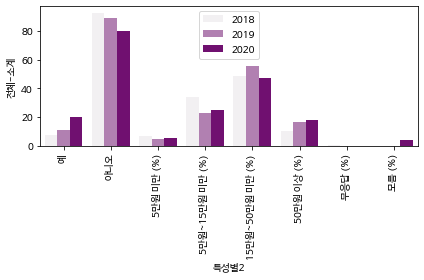

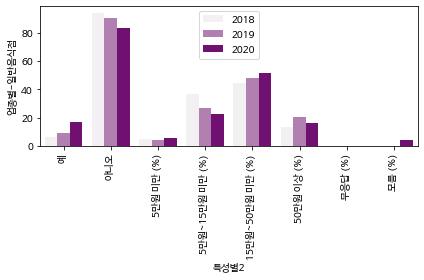

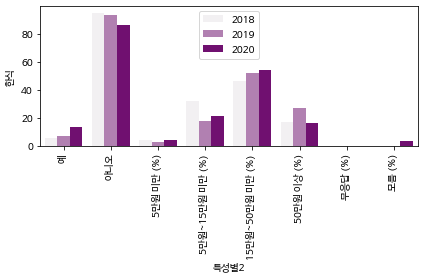

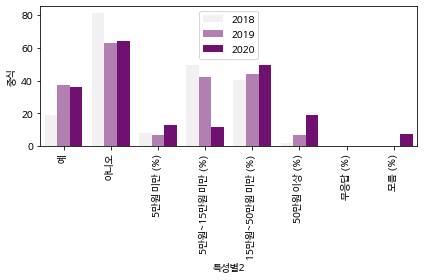

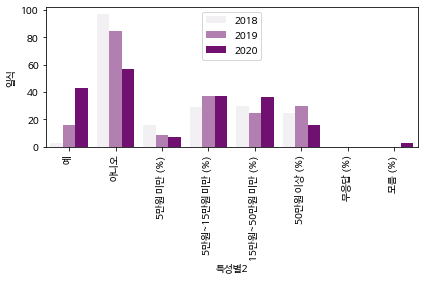

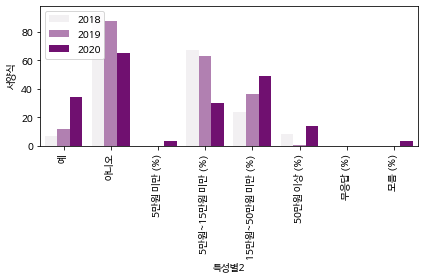

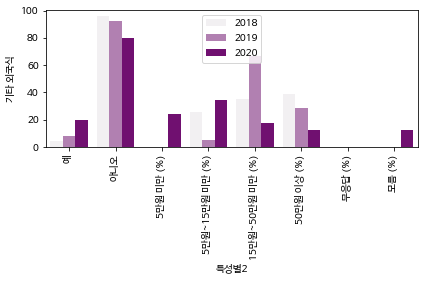

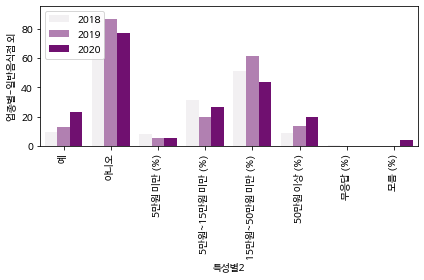

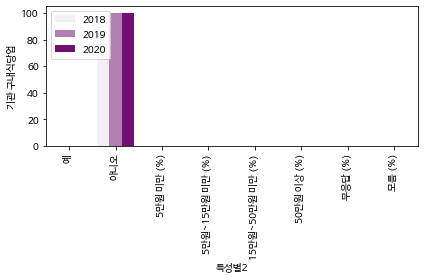

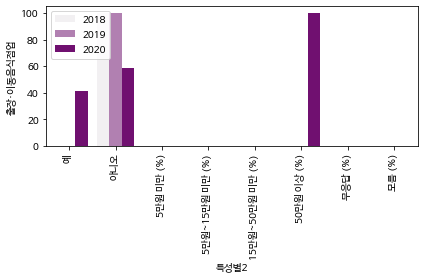

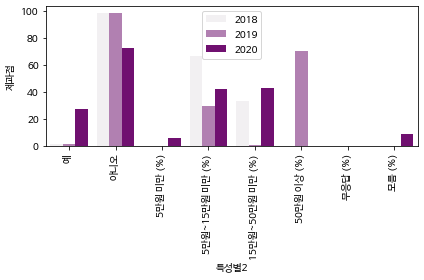

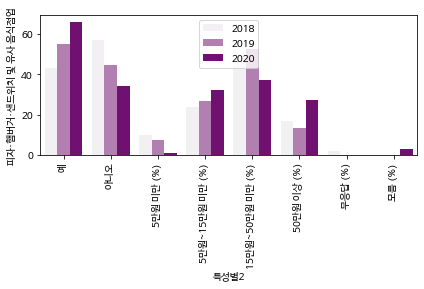

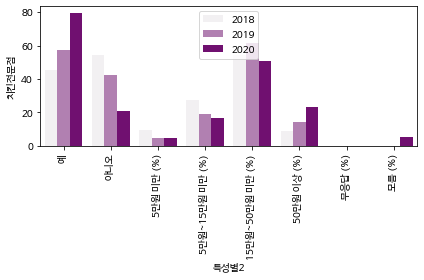

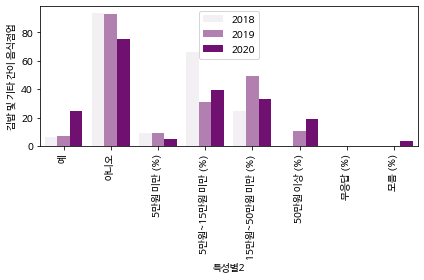

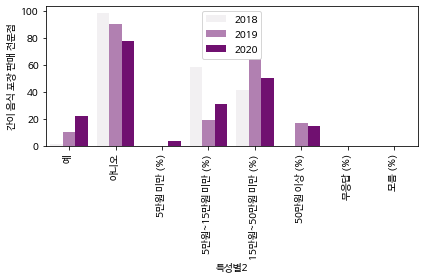

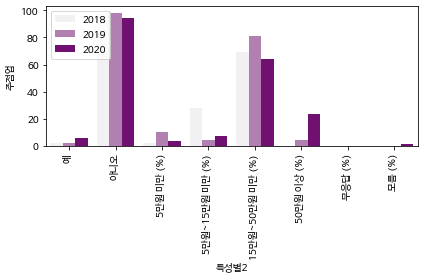

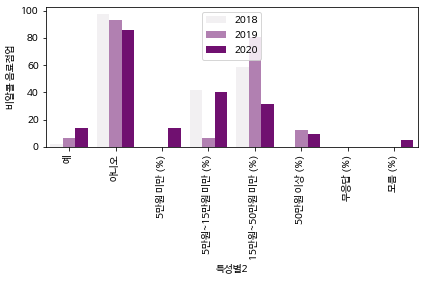

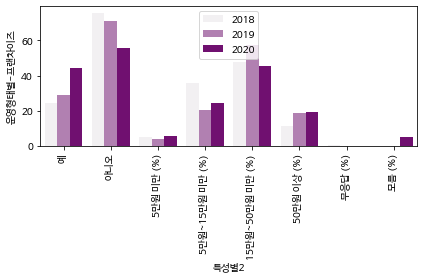

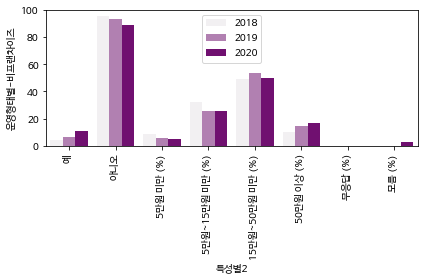

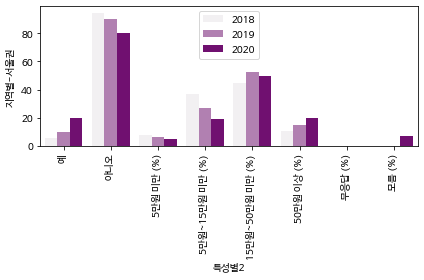

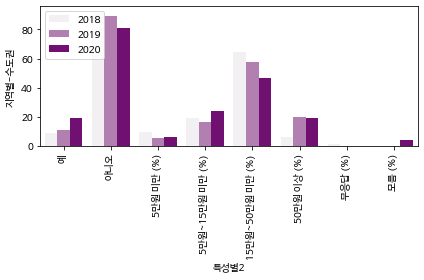

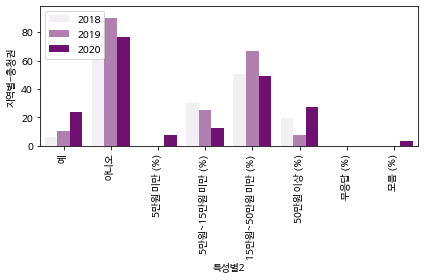

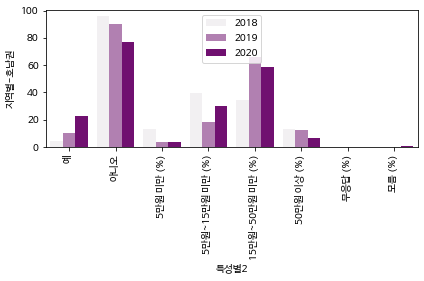

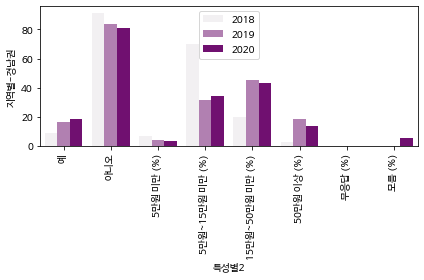

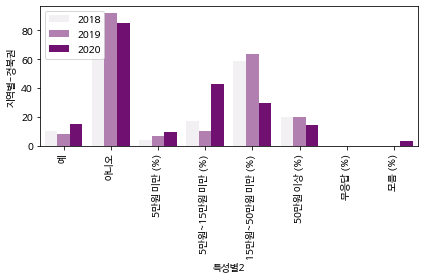

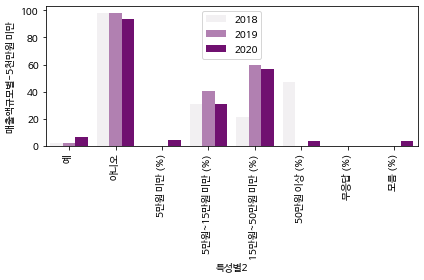

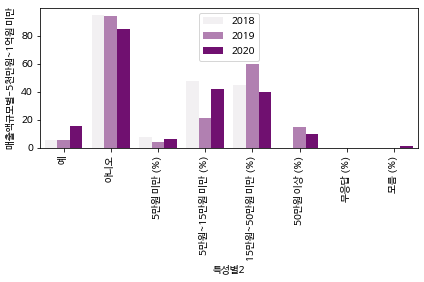

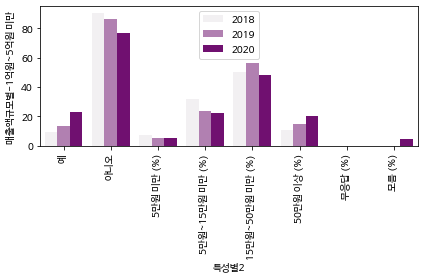

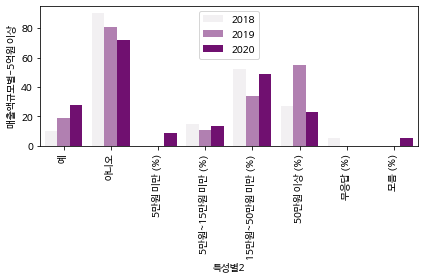

In [62]:
df_col = df_delivery_T.iloc[:, 2:-1]
plt.tight_layout()
for i, x in enumerate(df_col):
  ax = fig.add_subplot(len(df_col.columns), 1, i+1)
  sns.barplot(data=df_delivery_T[df_delivery_T['특성별2']!='평균 (원)'], 
            x='특성별2', y=x, 
            hue='time',
            color='purple')
  plt.legend(loc='best')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()